In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt

### Changing the image from png to numpy array

In [2]:
# X_max and y_max can be made smaller to visualize more enlarged correlations

img = corr.png_to_numpy('data/time_048.png', 128)

## Visualizing the microstructure(cropped)

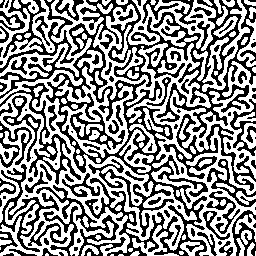

In [3]:
Image.fromarray(img)

## Binarize array

In [4]:
img_binary = corr.binarize_image(img)
img_binary.shape

(256, 256)

In [5]:
img_binary = img_binary.astype(np.longdouble)

In [6]:
type(img_binary[0][0])

numpy.float128

In [7]:
img_binary

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.]], dtype=float128)

In [8]:
#img_binary = np.array([[0., 0., 0.],[0., 1., 0.],[0., 0., 0.]])

In [9]:
img_binary.shape

(256, 256)

# Correlation plots obtained by using PYMKS library

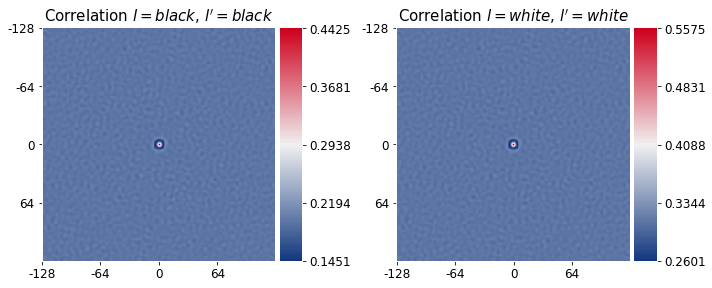

In [10]:
# Auto Correlation

auto_pymks =corr.auto_corr_from_pymks(img_binary)


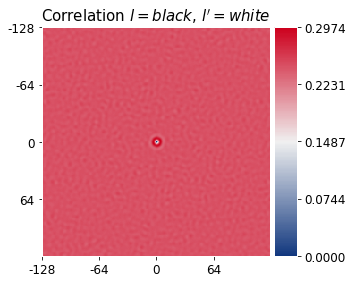

In [11]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white region : 


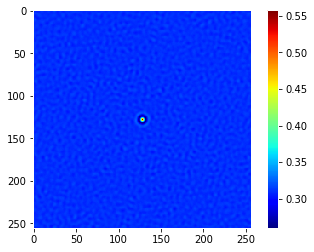

black region : 


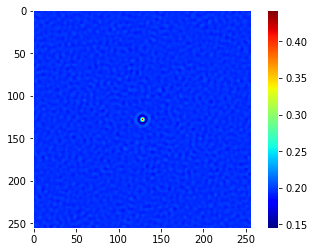

In [12]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)

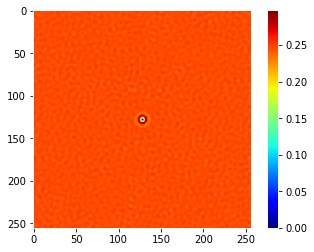

In [13]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)

In [14]:
np.min(cross.flatten())

1.3877787807814457e-17

In [15]:
cross_flat = (cross[128])
cross_pymks_flat = (cross_pymks[0][128].flatten())

## Plotting 2 point stats accross all vectors

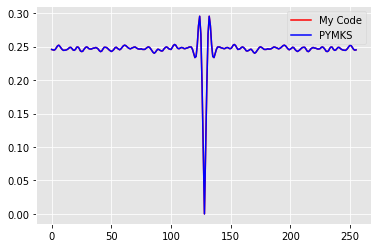

In [16]:
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.legend(['My Code','PYMKS'])


## Showing close up view to verify that there is no deviation

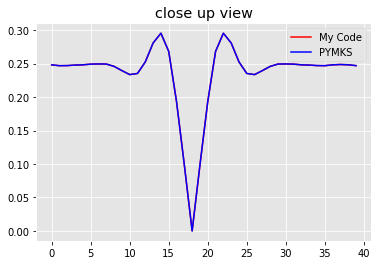

In [17]:
cross_flat = (cross[128])[110:150]
cross_pymks_flat = (cross_pymks[0][128].flatten())[110:150]
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])


# Radial Destribution Probability

From outputs of my code


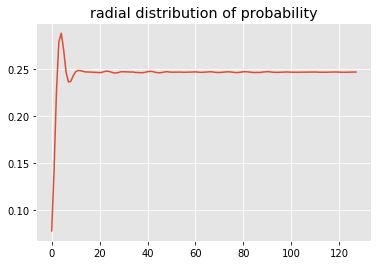

In [25]:
## From my code

r_val =corr.radialDistribution(cross)
reshaped_from_pymks = np.reshape(cross_pymks.flatten(),cross.shape)
print('From outputs of my code')

From outputs of PyMKS


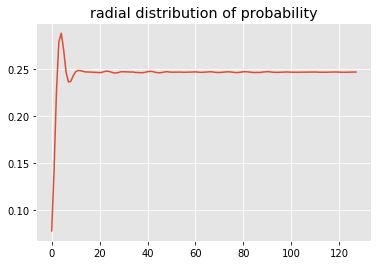

In [26]:
## From PYMKS

r_val_pymks = corr.radialDistribution(reshaped_from_pymks)
print('From outputs of PyMKS')

# Getting radially distributed prob between 2 angles

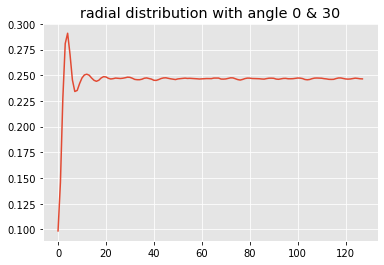

In [27]:
AngleChosenForOutput, radialProbDistribution =corr.giveAvailablePoints(cross,0,30)

Text(0.5, 1.0, 'Angles Chosen')

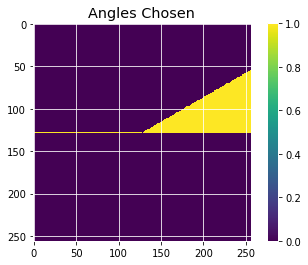

In [28]:
plt.imshow(AngleChosenForOutput)
plt.colorbar()
plt.title('Angles Chosen')